# Notebook for Testing the Insolation Feature

This is an example notebook for testing the insolation feature. 

It is a significant feature in predicting the solar power generation and makes our methodology unique.

The insolation feature is calculated by the following formula:

![Insolation_Formula](assets/insolation_formula.png)

> Note: Please refer to our [presentation pdf](assets/OIBC_Presentation.pdf) for more information on the insolation feature.

> Note: Please understand that a few annotations in this notebook are written in Korean.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd

an = [1.000110,0.034221,0.000719]
bn = [0,0.001280,0.000077]
cn = [0.006918,-0.399912,-0.006758,-0.002697]
dn = [0,0.070257,0.000907,0.000148]


LN = datetime.datetime(2022,11,22,12,17,50) # local noon time
S = 1367 # solar constant
L = 36.9 # latitude
L_rad = np.deg2rad(L) # latitude를 rad으로 변환


d = 325 # day number of 22 NOV
t = 2*np.pi*d/365
st_time = datetime.datetime(2022,11,22,7,00,00)
en_time = datetime.datetime(2022,11,22,18,00,00)

In [2]:
print(LN-st_time)

5:17:50


In [3]:
# sun-earth distance on 22 NOV : r0 값을 알 수 없어서, a로 근사한 식을 이용함
r0_r2=0
for i in range(0,3) :
    r0_r2 = r0_r2+an[i]*np.cos(i*t)+bn[i]*np.sin(i*t)

# declination angle on 22 NOV
delta_rad=0
for i in range(0,4) :
    delta_rad = delta_rad+cn[i]*np.cos(i*t)+dn[i]*np.sin(i*t)

In [4]:
# Solar insolation for minute gap
hi = []
i = 0
time_gap = 0
time = st_time
time_x = []
while time <= en_time :
    time = st_time+datetime.timedelta(minutes=i)
    if time < LN :
        time_gap = LN-time
    else :
        time_gap = time-LN
    hi.append(time_gap.seconds*np.pi/43200)
    time_x.append(time)
    if time == en_time :
        break
    i+=1
hi = np.array(hi) #radians
Q = []
for j in range(len(hi)) :
    Q.append(S*r0_r2*((np.sin(L_rad)*np.sin(delta_rad))+((24/np.pi)*np.cos(L_rad)*np.cos(delta_rad)*np.sin(np.pi/24)*np.cos(hi[j]))))
    if Q[j] < 0 :
        Q[j] = 0
    else :
        Q[j] = Q[j]

In [5]:
# Solar insolation for hour gap
Q_h = []
gap = np.pi/12
for j in range(0,9) :
    Q_h.append(S*r0_r2*((np.sin(L_rad)*np.sin(delta_rad))+((24/np.pi)*np.cos(L_rad)*np.cos(delta_rad)*np.sin(np.pi/24)*np.cos((j-4)*gap))))

In [6]:
# 표 만들기 for hour gap
time_arr = []
for j in range (0,9) :
    time_arr.append(LN-datetime.timedelta(hours=4)+datetime.timedelta(hours=j))
df = pd.DataFrame({'Time':time_arr,'Hourly solar insolation (Q) [W/m2]':Q_h,})
df

,Time,Hourly solar insolation (Q) [W/m2]
0,2022-11-22 08:17:50,238.880494
1,2022-11-22 09:17:50,456.611147
2,2022-11-22 10:17:50,623.681753
3,2022-11-22 11:17:50,728.706727
4,2022-11-22 12:17:50,764.528789
5,2022-11-22 13:17:50,728.706727
6,2022-11-22 14:17:50,623.681753
7,2022-11-22 15:17:50,456.611147
8,2022-11-22 16:17:50,238.880494


In [7]:
# 표 만들기 for minute gap
df = pd.DataFrame({'Time':time_x,'Hourly solar insolation (Q) [W/m2]':Q,})
df

,Time,Hourly solar insolation (Q) [W/m2]
0,2022-11-22 07:00:00,0.0
1,2022-11-22 07:01:00,0.0
2,2022-11-22 07:02:00,0.0
3,2022-11-22 07:03:00,0.0
4,2022-11-22 07:04:00,0.0
...,...,...
656,2022-11-22 17:56:00,0.0
657,2022-11-22 17:57:00,0.0
658,2022-11-22 17:58:00,0.0
659,2022-11-22 17:59:00,0.0


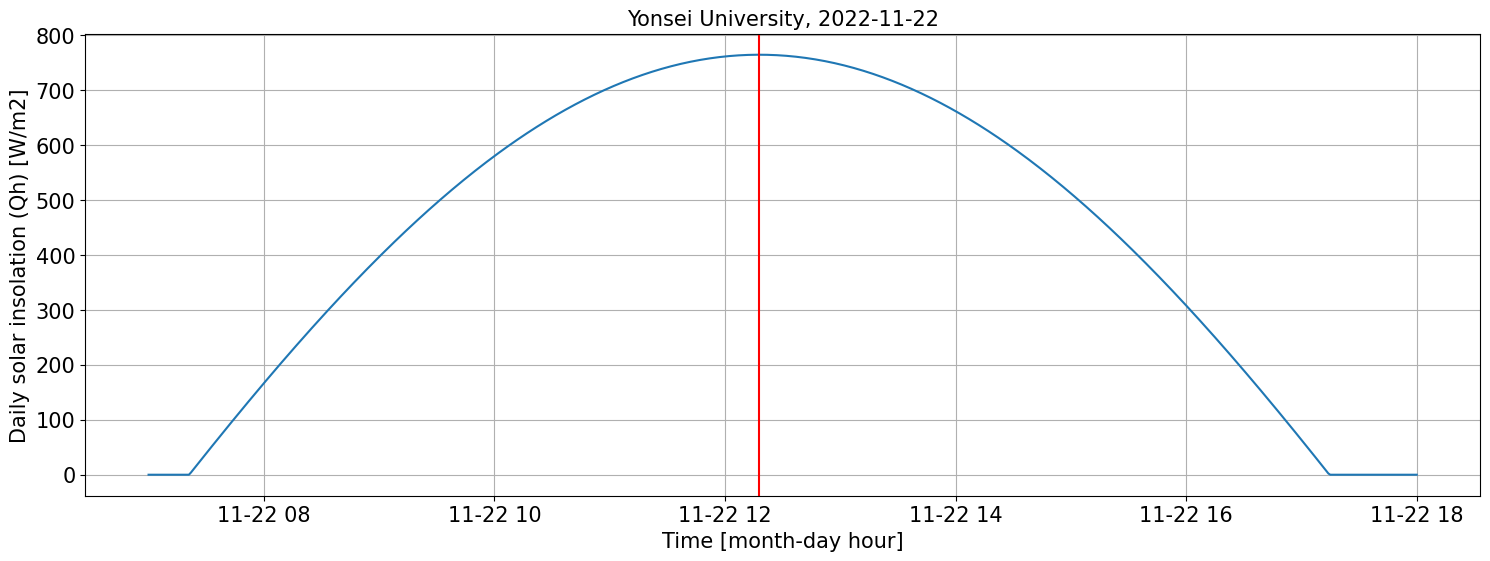

In [8]:
fig = plt.figure(figsize = (18,6),facecolor = 'white')
ax = fig.add_subplot(1,1,1)
ax.plot(time_x, Q)
ax.set_xlabel('Time [month-day hour]',fontsize=15)
ax.set_ylabel('Daily solar insolation (Qh) [W/m2]',fontsize=15)
ax.axvline(x=LN,color='red')
plt.title('Yonsei University, 2022-11-22',fontsize=15)
ax.tick_params(labelsize=15)
ax.grid()